In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import svd
import numpy as np
import math
from scipy import interpolate
import cv2
import random
from numpy.linalg import inv
import scipy.io
import pydicom
import cmath
import tensorflow_graphics  as tfg
from scipy.spatial.transform import Rotation as R
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import cv2
import scipy.io
import pprint

(4, 4)


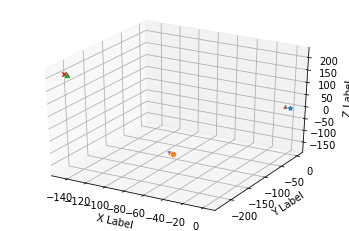

In [2]:
voxelToRas = np.array([[1.0000,0.0000,0.0000,-82.8230], [ 0.0000,1.0000,0.0000,  -105.6433], [0.0000,0.0000,1.0000,  -167.5065], [0,0, 0, 1]])
dcsToTcs = np.array([[0.8879,0.4599,-0.0003,-20.7055], [-0.213,0.413421767921822283,0.8850,-55.396], [0.407,-0.785 ,0.465,240.9273], [0,0, 0, 1]])
TcsMovement = np.array([[0.997601,0.018043,0.012985,-3.296745 ], [-0.017952,0.997480,-0.007207,1.258991], [-0.013119,0.006972,0.997588,0.054566 ], [0,0, 0, 1]])
 
voxelToTranslate =[1,1,1,1]
print(voxelToRas.shape)
inRas = np.array(np.dot(voxelToRas, voxelToTranslate))
inTcs = np.dot(dcsToTcs, inRas)
inTcsMoved = np.dot(TcsMovement, inTcs)

backToDcs = np.array(np.dot(inv(dcsToTcs), inTcsMoved))
backToVoxel = np.array(np.dot(inv(voxelToRas), backToDcs))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(voxelToTranslate[0], voxelToTranslate[1], voxelToTranslate[2],marker="*")
ax.scatter(inRas[0], inRas[1], inRas[2],marker="o")
ax.scatter(inTcs[0], inTcs[1], inTcs[2],marker="^")
ax.scatter(inTcsMoved[0], inTcsMoved[1], inTcsMoved[2],marker="x")
ax.scatter(backToDcs[0], backToDcs[1], backToDcs[2],marker="1")
ax.scatter(backToVoxel[0], backToVoxel[1], backToVoxel[2],marker="2")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()





In [3]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower")

(256, 256, 256)


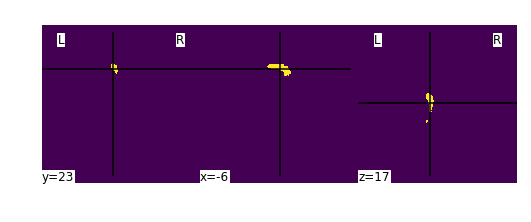

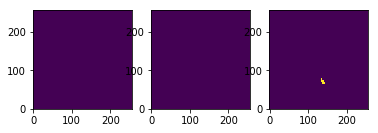

In [7]:
img1 = nib.load("../regions/region 1_1 (11 Left-Caudate ).nii.mgz")
print(img1.shape)
plotting.plot_img("../regions/region 1_1 (11 Left-Caudate ).nii.mgz")
anat_img_data = img1.get_fdata()
show_slices([anat_img_data[125, :, :],
              anat_img_data[:, 125, :],
              anat_img_data[:, :, 128]])

In [ ]:
print(np.count_nonzero(anat_img_data[:, 33, :] == 0))
np.savetxt("outfile.txt", anat_img_data[:, 33, :])

In [ ]:
new_img = nib.Nifti1Image(result, img1.affine, img1.header)
new_img.to_filename("centroids4.nii")

In [ ]:
for root, dirs, files in os.walk("."):
    for file in files:
        if "region 254" in file:
            path = root+"/"+file
            img = read_nii(path)
            indeces = np.where(img == 1)
            centerx,centery,centerz = compute_centroid(indeces)
            print(centerx,centery,centerz)


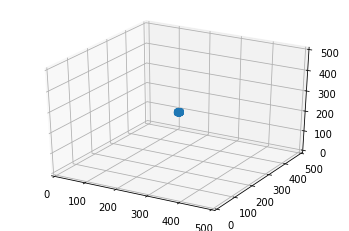

In [15]:
test = np.zeros((500,500,500))
for i in range(250-5,250+5):
    for j in range(250-5,250+5):
        for k in range(250-5,250+5):
            test[i][j][k] = 100
indeces1 = np.where(test > 0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(indeces1[0],indeces1[1],indeces1[2],marker="o",alpha = 1)
ax.set_xlim([0,500])
ax.set_ylim([0,500])
ax.set_zlim([0,500])
plt.show()



test = np.zeros((50,50,50))
for i in range(5,15):
    for j in range(5,15):
        for k in range(5,15):
            test[i][j][k] = 100
indeces = np.where(test > 0)

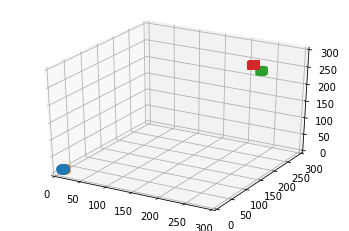

In [21]:
x = []
y = []
z = []
histogram = []
for i in range(len(indeces[0])):
    mat = scipy.io.loadmat("../matrices4/test8000")
    transf = mat["matrix"]
    ec = [indeces[0][i],indeces[1][i],indeces[2][i],1]
    newCentroid = np.dot(transf, ec)
    x.append(newCentroid[0])
    y.append(newCentroid[1])
    z.append(newCentroid[2])
    ssd = np.sqrt(abs((np.array(newCentroid)-np.array(ec)))).sum()
    histogram.append(ssd)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,marker="o",alpha = 0.7)
ax.scatter(indeces[0],indeces[1],indeces[2],marker="x",alpha = 0.3)
ax.scatter(indeces1[0],indeces1[1],indeces1[2],marker="x",alpha = 0.3)
ax.scatter(x1,y1,z1,marker="s",alpha = 0.7)
ax.set_xlim([0,300])
ax.set_ylim([0,300])
ax.set_zlim([0,300])
plt.show()            
            
            

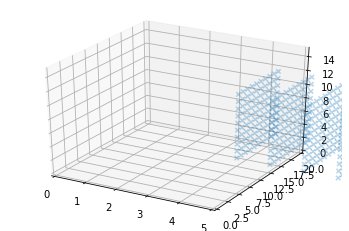

In [20]:
x1 = []
y1 = []
z1 = []
histogram1 = []
for i in range(len(indeces[0])):
    mat = scipy.io.loadmat("../matrices4/test8000")
    transf = mat["matrix"]
    ec = [indeces1[0][i],indeces1[1][i],indeces1[2][i],1]
    newCentroid = np.dot(transf, ec)
    x1.append(newCentroid[0])
    y1.append(newCentroid[1])
    z1.append(newCentroid[2])
    ssd1 = np.sqrt(abs((np.array(newCentroid)-np.array(ec)))).sum()
    histogram1.append(ssd1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(indeces[0],indeces[1],indeces[2],marker="x",alpha = 0.3)
ax.scatter(x1,y1,z1,marker="o",alpha = 0.51)
ax.set_xlim([0,5])
ax.set_ylim([0,20])
ax.set_zlim([0,15])
plt.show()       

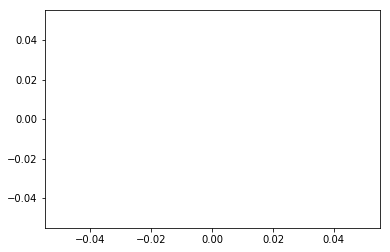

In [17]:
x = np.arange(len(histogram1))
 
plt.plot(x,histogram1)
plt.show()    

1000


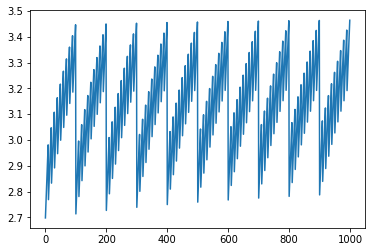

In [18]:
 
x = np.arange(len(histogram))
print(len(x))
plt.plot(x,histogram)
plt.show()    

In [19]:
def ssd(A,B):
    return np.sqrt(((np.array(A)-np.array(B))**2).sum())

In [12]:
mat = scipy.io.loadmat("../matrices4/test8000")
transf = mat["matrix"]
val1 = np.array([1,1,1,1])
val3 = np.array([50,50,50,1])
val2 = np.array([101,101,101,1])
nv1 = transf@val1
nv2 = transf@val2
nv3 = transf@val3

print(nv1-nv2)
print(nv1-nv3)

print(val1,nv1)
print(val2,nv2)
print(val1-nv1)
print(val2-nv2)
print(ssd(val1,val2))
print(ssd(val2,nv2))
print(ssd(nv1,nv2))

[ -95.29805712  -98.13716648 -107.39649501    0.        ]
[-46.69604799 -48.08721157 -52.62428256   0.        ]
[1 1 1 1] [ 0.11049987 -0.5394129   0.85577482  1.        ]
[101 101 101   1] [ 95.408557    97.59775357 108.25226983   1.        ]
[0.88950013 1.5394129  0.14422518 0.        ]
[ 5.591443    3.40224643 -7.25226983  0.        ]
173.20508075688772
9.769080473461297
173.91558376575773


In [ ]:
A_dcs2ecs=np.array([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
A_tcs2dcs = readtcs2dcs("2020-01-07_invivo_mprage_172211_ALN.tsa")
A_tcs2ecs = np.linalg.inv(A_dcs2ecs)@A_tcs2dcs
time = getAcqTimeFromDICOM("TCLINVIVO02_MPRAGE.MR.MOCO_TRACOLINE_TEST.0004.0001.2020.01.07.18.40.58.920830.9391229.IMA.dcm")
# "173924.745000"
#time = "132930.003"
refFrame = findFrameNumber("2020-01-07_invivo_mprage_172211_TIM.tst", time)
#refTr = transform("2020-01-16_test_Tracoline_invivo_N10_132143_POA.tsp", A_tcs2ecs, refFrame)
print(time,refFrame)

In [ ]:
frame = findFrameNumberInLog("D:/denmark/master/thesis/Thesis repo/thesis/2015-05-19_EV/2015-05-19_EV_132052_LOG.log", "135933.347500")
print(frame)

In [ ]:
#plot the rotation axis for mats 1500->1550 as from the origin
for i in range(1500,1550):
    p = [128,128,128]
    j = 500
    p1 = p + j*rotAxes[i]
    p2 = p  - j*rotAxes[i]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(indeces[0],indeces[1],indeces[2],marker="o",alpha = 1)
    ax.scatter(indeces1[0],indeces1[1],indeces1[2],marker="x",alpha = 1)

    x_values = [p2[0],p1[0]]
    y_values = [p2[1],p1[1]]
    z_values = [p2[2],p1[2]]
    ax.plot3D(x_values,y_values,z_values)
    ax.set_title(mat[i])
    ax.set_xlim([50,200])
    ax.set_ylim([50,200])
    ax.set_zlim([50,200])

    #plt.savefig("./axis/"+m +".png")
    plt.show()

In [ ]:
#plot the rotation axis for mats 1500->1550 from the rotation point

for i in range(1500,1550):
 
    j = 500
    p1 = points[i] + j*rotAxes[i]
    p2 = points[i]  - j*rotAxes[i]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(indeces[0],indeces[1],indeces[2],marker="o",alpha = 1)
    ax.scatter(indeces1[0],indeces1[1],indeces1[2],marker="x",alpha = 1)

    x_values = [p2[0],p1[0]]
    y_values = [p2[1],p1[1]]
    z_values = [p2[2],p1[2]]
    ax.plot3D(x_values,y_values,z_values)
    ax.set_title(mat[i])
    #ax.set_xlim([0,256])
    #ax.set_ylim([0,256])
    #ax.set_zlim([0,256])

    #plt.savefig("./axis/"+m +".png")
    plt.show()
     

In [ ]:
plt.plot(np.array(rotAxes)[:100,0])
plt.show()

In [ ]:
subjects = ["2015-04-14_EB", "2015-05-19_EV","2015-09-01_TSS","2015-10-06_RMI","2015-10-09_SK"]
subject = subjects[2]
aln, tim, poa, log  = getFileNames(path+subject)
A_dcs2ecs=np.array([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
A_tcs2dcs = readtcs2dcs(aln)
A_tcs2ecs = np.linalg.inv(A_dcs2ecs)@A_tcs2dcs
time = getTime(file,subject)
refFrame = findFrameNumberInLog(log, time)
print(refFrame)
if not os.path.exists("./matrices "+subject):
            os.mkdir("./matrices "+subject)
refTr = transform(poa, A_tcs2ecs, refFrame, "./matrices "+subject)
print(refTr)

In [ ]:
with open("../GA liste edited.csv", 'r') as inp, open('first_edit.csv', 'a', newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        for root, dirs, files in os.walk("./regions binarization"):
            for subject in dirs:  
                print(subject,row[3])
                if  row[3] in subject and row[3]!="" and subject!="":
                    row.append(subject)
        if len(row)>8:            
            writer.writerow(row)  

In [ ]:
def fix_ref(hist,sub,mode):
    for root, dirs, files in os.walk("../"+mode+"/matrices "+sub):
        for f in files:
            if "ref" in f:
                idx = files.index(f)
                for i in range(16):
                    del hist[i][idx]
                return hist